In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
from keras import applications, optimizers
from keras.models import Sequential
from keras.applications.vgg16 import vgg16, preprocess_input
from keras.utils import to_categorical
from keras.models import *
from keras.layers import *
from keras.regularizers import l2
import numpy as np
import keras
import h5py
import functools
ile_ras = 40

Using TensorFlow backend.


In [2]:
cd gdrive/My Drive/Colab Notebooks

/content/gdrive/My Drive/Colab Notebooks


In [1]:
ls

gdrive/  sample_data/


In [0]:
hf = h5py.File('XYtrain_test.h5', 'r')
x_train = hf.get('x_train')
y_train = hf.get('y_train')
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = hf.get('x_test')
y_test = hf.get('y_test')
x_test = np.array(x_test)
y_test = np.array(y_test)
hf.close()

In [0]:
top5_acc = functools.partial(keras.metrics.top_k_categorical_accuracy, k=5)

top5_acc.__name__ = 'top5_acc'

                   

In [6]:
img_width, img_height = 224, 224
model = applications.VGG16(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

pool = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)


x = model.layers[-3].output
x = pool(x)              
x = Flatten()(x)
x = Dense(4096, activation="relu")(x)
x = Dense(4096, activation="relu")(x)
predictions = Dense(40, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy",top5_acc])

model_final.summary()


W0618 17:28:42.709628 140188592576384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 17:28:42.890215 140188592576384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 17:28:42.915759 140188592576384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 17:28:42.983709 140188592576384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0618 17:28:43.529248 140188592576384 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [7]:
for l in model_final.layers:
    print(l.name, l.trainable)

input_1 False
block1_conv1 True
block1_conv2 True
block1_pool True
block2_conv1 True
block2_conv2 True
block2_pool True
block3_conv1 True
block3_conv2 True
block3_conv3 True
block3_pool True
block4_conv1 True
block4_conv2 True
block4_conv3 True
block4_pool True
block5_conv1 True
block5_conv2 True
max_pooling2d_1 True
flatten_1 True
dense_1 True
dense_2 True
dense_3 True


In [0]:
epochs = 50

dict_keys(['loss', 'acc', 'top5_acc'])


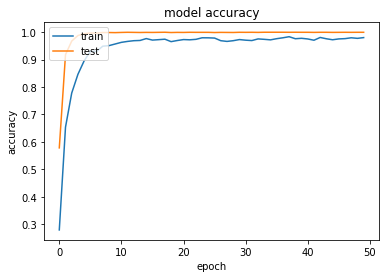

In [0]:
print(learning.history.keys())
plt.plot(learning.history['acc'])
plt.plot(learning.history['top5_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
model_final.load_weights('CASE3/case3b_weights.h5')

In [0]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy",top5_acc])

In [0]:
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects

def custom_activation(x):
   return (K.square(x) + x)+1
  #return (K.exp(x))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

In [14]:
x = model_final.layers[-5].output          
x = Flatten()(x)
x = Dense(40, W_regularizer=l2(0.01))(x)
predictions = Activation('custom_activation')(x)

# creating the final model 
model_final = Model(input = model_final.input, output = predictions)

# compile the model 

for layer in model_final.layers[:-2]:
    layer.trainable = False
model_final.compile(loss='categorical_hinge',optimizer='adadelta',metrics=['accuracy',top5_acc])
model_final.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, kernel_regularizer=<keras.reg...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("ac...)`
  import sys


In [16]:
learning = model_final.fit(x_train, y_train, epochs=epochs, batch_size = 32,validation_split=0.1)

Train on 5253 samples, validate on 584 samples
Epoch 1/50
5253/5253 [==============================] - 33s 6ms/step - loss: 16686.6515 - acc: 0.7807 - top5_acc: 0.9716 - val_loss: 20904.3575 - val_acc: 0.7637 - val_top5_acc: 0.9640
Epoch 2/50
5253/5253 [==============================] - 31s 6ms/step - loss: 8229.0581 - acc: 0.8793 - top5_acc: 0.9918 - val_loss: 14306.7761 - val_acc: 0.8116 - val_top5_acc: 0.9795
Epoch 3/50
5253/5253 [==============================] - 30s 6ms/step - loss: 5723.8437 - acc: 0.9073 - top5_acc: 0.9941 - val_loss: 11592.3491 - val_acc: 0.8134 - val_top5_acc: 0.9880
Epoch 4/50
5253/5253 [==============================] - 31s 6ms/step - loss: 4654.0426 - acc: 0.9181 - top5_acc: 0.9977 - val_loss: 26831.1523 - val_acc: 0.7260 - val_top5_acc: 0.9606
Epoch 5/50
5253/5253 [==============================] - 31s 6ms/step - loss: 3247.9481 - acc: 0.9433 - top5_acc: 0.9985 - val_loss: 13978.4780 - val_acc: 0.8031 - val_top5_acc: 0.9795
Epoch 6/50
5253/5253 [==========

In [0]:
model_final.save_weights('case4_full_exp_weights.h5')

In [0]:
np.save("case4_full_exp_history",learning)

In [0]:
eval = np.c_[score[0],score[1],score[2]]
sc = np.array(eval)
np.savetxt("case4_mod_poly_evaluate.txt", sc, delimiter=";")

In [0]:
history1 = np.c_[learning.history["loss"],learning.history['acc'],learning.history['top5_acc'],learning.history['val_loss'],learning.history['val_acc'],learning.history['val_top5_acc']]
hist = np.array(history1)
np.savetxt("case4_mod_poly_hist_n.txt", hist, delimiter=";")

In [0]:
score = model_final.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
